# Machine learning and deep learning on tabular data

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-" data-toc-modified-id="Introduction--1">Introduction <a class="anchor" id="1"></a></a></span></li><li><span><a href="#Prepare-tabular-data-" data-toc-modified-id="Prepare-tabular-data--2">Prepare tabular data <a class="anchor" id="2"></a></a></span><ul class="toc-item"><li><span><a href="#Data-Preprocessing-for-FullyConnectedNetwork" data-toc-modified-id="Data-Preprocessing-for-FullyConnectedNetwork-2.1">Data Preprocessing for FullyConnectedNetwork<a class="anchor" id="3"></a></a></span></li><li><span><a href="#Data-Preprocessing-for-MLModel" data-toc-modified-id="Data-Preprocessing-for-MLModel-2.2">Data Preprocessing for MLModel<a class="anchor" id="4"></a></a></span></li></ul></li><li><span><a href="#Load-model-architecture" data-toc-modified-id="Load-model-architecture-3">Load model architecture<a class="anchor" id="5"></a></a></span><ul class="toc-item"><li><span><a href="#FullyConnectedNetwork-" data-toc-modified-id="FullyConnectedNetwork--3.1">FullyConnectedNetwork <a class="anchor" id="6"></a></a></span></li><li><span><a href="#MLModel" data-toc-modified-id="MLModel-3.2">MLModel<a class="anchor" id="7"></a></a></span></li></ul></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-4">Model Training<a class="anchor" id="8"></a></a></span><ul class="toc-item"><li><span><a href="#FullyConnectedNetwork-Model-Training-" data-toc-modified-id="FullyConnectedNetwork-Model-Training--4.1">FullyConnectedNetwork Model Training <a class="anchor" id="9"></a></a></span><ul class="toc-item"><li><span><a href="#Learning-Rate-Search" data-toc-modified-id="Learning-Rate-Search-4.1.1">Learning Rate Search</a></span></li></ul></li><li><span><a href="#ML-Model-Training" data-toc-modified-id="ML-Model-Training-4.2">ML Model Training<a class="anchor" id="10"></a></a></span></li></ul></li><li><span><a href="#Model-Validation-metrics,-Saving-&amp;-Loading" data-toc-modified-id="Model-Validation-metrics,-Saving-&amp;-Loading-5">Model Validation metrics, Saving &amp; Loading<a class="anchor" id="11"></a></a></span></li><li><span><a href="#Model-Inferencing-" data-toc-modified-id="Model-Inferencing--6">Model Inferencing <a class="anchor" id="12"></a></a></span><ul class="toc-item"><li><span><a href="#Predicting-to-features" data-toc-modified-id="Predicting-to-features-6.1">Predicting to features</a></span></li><li><span><a href="#Predicting-to-rasters" data-toc-modified-id="Predicting-to-rasters-6.2">Predicting to rasters</a></span></li></ul></li><li><span><a href="#Summary-" data-toc-modified-id="Summary--7">Summary <a class="anchor" id="13"></a></a></span></li></ul></div>

## Introduction <a class="anchor" id="1"></a>

The `arcgis.learn` module includes [FullyConnectedNetwork](https://developers.arcgis.com/python/api-reference/arcgis.learn.html#fullyconnectednetwork) and [MLModel](https://developers.arcgis.com/python/api-reference/arcgis.learn.html#mlmodel) classes to train machine learning and deep learning models on tabular data. Tabular data can be any vector data in the form of a [feature layer](https://developers.arcgis.com/python/guide/working-with-feature-layers-and-features/) or [spatially enabled dataframe](https://developers.arcgis.com/python/guide/introduction-to-the-spatially-enabled-dataframe/). Explanatory variables can take the form of fields in the attribute table of the feature layer, raster datasets, or distance features used to calculate proximity values for use as additional variables. In addition to validation of model performance based on the training data, predictions can be made to produce either features or a prediction raster.  Predictions can be performed for both categorical variables and continuous variables.

The `FullyConnectedNetwork` model is based on deep neural networks, whereas the `MLModel` uses machine learning algorithms to train models.

The `MLModel` allows you to use any [regression](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) or [classification](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) model from scikit-learn, whereas `FullyConnectedNetwork` allows you to train a deep neural network with a specified number of layers.

## Prepare tabular data <a class="anchor" id="2"></a>

Data preparation can be a time consuming process that typically involves splitting the data into training and validation sets, applying various data augmentation techniques, creating the necessary data structures for loading data into the model, memory management by using the appropriately sized mini-batches of data, and so on.

You can use the `prepare_tabulardata()` method to create a `TabularDataObject` that can be fed into the `MLModel` and the `FullyConnectedNetwork` models. It allows you to use attribute data from feature layers and spatially enabled  `DataFrame`s. Additionally, you can use explanatory variables from rasters. The raster can be imagery layer which can be accessed through ArcGIS Enterprise or local raster files which can be accessed using the `Raster` class from the `arcgis.raster` module. This method performs normalization of the datasets, imputation, and splits it into training and validation datasets before feeding the datasets into the model.

By default the `prepare_tabulardata()` method treats the fields in the training data as continuous variables. If you have categorical variables, pass that variable as a `(<filed_name>, True)` tuple as shown below:

`X = ["Field_1", ("Field_2", True),......."Field_n"]`

Here **Field_2** is treated as categorical and the others as continuous variables. If variables are stored as multiple rasters, then pass them as a list of `Raster` objects as shown below:

`explanatory_rasters = [RasterObject1,(RasterObject2, True),.......RasterObjectn]` 

Here, `RasterObject2` is treated as categorical and the others as continuous variables.

### Data Preprocessing for FullyConnectedNetwork<a class="anchor" id="3"></a>  

Once the explanatory variables and explanatory rasters are defined, we can prepare our TabularDataObject by using `prepare_tabulardata()` function. The following are some of the key arguments for this function:

- `input_features`: It takes in data in the form of a feature layer or spatially enabled DataFrame. Feature layers can be of point or polygon geometry.

- `variable_predict`: Field name from the `input_features` layer. It automatically deduces fields as continuous or categorical by using a simple logic. If the field type is float and has more than 20 unique values, the field is considered continuous. Otherwise, the field will be considered categorical.

- `date_field`: Field name from the `input_features` layer. If specified, the field will be split into year, month, week, day, dayofweek, dayofyear,  is_month_end, is_month_start, is_quarter_end,  is_quarter_start, is_year_end, is_year_start,  hour, minute, second, elapsed.  If specified here, there is no need to specify as part of `explanatory_variables`.

- `explanatory_variables` : List of the field names containing the explanatory variables from the `input_layer`, where tuples of size 2 have to be passed for categorical variables as discussed above. 

- `explanatory_rasters` : List of the field names containing the explanatory variables in multiple input rasters, where tuples of size 2 have to be passed for categorical variables as discussed above.

- `distance_features`: Distance features are used to automatically create explanatory variables by calculating a distance from the provided features to the input_features. Distances will be calculated from each of the input explanatory distance features to the nearest Input training features. If the input `distance_features` are polygons or lines, the distance attributes are calculated as the distance between the closest segments of the pair of features. However, distances are calculated differently for polygons and lines. See how [proximity tools calculate distance](https://pro.arcgis.com/en/pro-app/tool-reference/analysis/how-near-analysis-works.htm) for details.

Once the explanatory variables or the explanatory rasters list is ready, these can now be used as input for the `prepare_tabulardata()` function. The function takes the feature layer or a spatial DataFrame containing the dataset along with the y-vairable defined as the variable_predict and prepares it for fitting the `FullyConnectedNetwork` model as follows:

In [ ]:
data = prepare_tabulardata(input_features,
                            variable_predict, 
                            explanatory_variables=X,
                            explanatory_rasters=explanatory_rasters)

### Data Preprocessing for MLModel<a class="anchor" id="4"></a>  
Similar to the `FullyConnectedNetwork`, here the first step consists of making a list of the explanatory variables. Continuous variables are listed as-is and categorical variables are listed as a `<variable_name>, True` tuple. Note that most of the components for the implementation of the `MLModel` framework are similar to that of the `FullyConnectedNetwork` other than a few exceptions, which are the `make_pipeline()`, `make_column_transformer` and the `MLModel()` methods. The `make_pipeline` and `make_column_transformer` are provided by sklearn library and these two are used to create the `preprocessors` parameter in the `prepare_tabulardata` method for `MLModel`.

The `make_pipeline` function is used for applying some operations on the full dataset instead of individual columns. Thus instead of different scalers, if the whole dataset is to be scaled with a single scaling function then this can be framed as 

`numerical_transformer = make_pipeline(MinMaxScaler())` followed by using it as an input for the make_column_transformer.
 
`preprocessors = make_column_transformer((numerical_transformer, X))` where X is the list of input columns. 

The `preprocessors` created from the above step would then be the input for the `prepare_tabulardata` method. The pipeline method could also be used for applying any number of steps like, step 1 -> step 2 -> step 3 and so on to the full dataset. For example, the below line will first scale a dataset using a scikit-learn scaler followed by applying a scikit-learn model to the scaled dataset:

`make_pipeline(StandardScaler(), GaussianNB(priors=None))`

The `make_column_transformer` function is used for applying column-wise transformation steps. With this the user can select any scaler function from scikit-learn to transform the fields using the selected scaler. Suppose we want to use scaler1 on column c1 & c2, and scaler2 on c3 & c4, then we can use it as follows:

`preprocessors = make_column_transfomer((scaler1, [c1,c2]), (scaler2,[c3,c4]))`

Thus, if there are both numerical and categorical fields in a dataset, they can be scaled using different scalers. Also, if the user wants to drop a column or to pass them through untransformed, then use strings `drop` and `passthrough` respectively instead of the scaler. It can also be used for applying multiple steps on each column like for column 1 - step 1 -> step 2 -> step 3 and then for column 2 - step 1 -> step 2 -> step 3.

Once the explanatory variables or the explanatory rasters list is ready, along with the `preprocessors` transformation,  these can now be used as input for the `prepare_tabulardata()` method. The method takes the `feature layer` or a spatial enabled `DataFrame` containing the dataset and prepares it for fitting the `MLModel` model as follows:

In [ ]:
from arcgis.learn import prepare_tabulardata
data = prepare_tabulardata(input_features,
                               variable_predict,
                               explanatory_variables=X,
                               preprocessors=preprocessors)

Here, most of the input parameters are similar to those described for `FullyConnectedNetwork`, other than the `preprocessors`. The `preprocessors`, as explained above, contains information about data transformations.

Now at this stage the `data.show_batch()` can be used for visualizing the data frame that is being used for the model. 

## Load model architecture<a class="anchor" id="5"></a>  

### FullyConnectedNetwork <a class="anchor" id="6"></a>

Once the data has been prepared by the `prepare_tabulardata` method it is ready to be passed to the ANN for training. The ANN is known here as the `FullyConnectedNetwork` and is imported from `arcgis.learn` followed by initialization of the neural network as follows:

```python
from arcgis.learn import FullyConnectedNetwork
fcn = FullyConnectedNetwork(data)
```

According to the default setting the initialization stored in the variable named fcn, creates a deep neural network of two hidden layers with the first layer containing 500 nodes and a second layer having 100 nodes. The user can add their own configuration of layers by passing a list in the `layers` parameter, specifying the number of nodes for each layer as follows:

In [ ]:
fcn = FullyConnectedNetwork(data, layers=[200, 300])

It will represent two hidden layers with nodes 300 and 200 respectively.

`Emb_szs` –  Usually categorical fields are transformed into numerical type by one-hot encoding or embedding. Here embedding is used where once the size of the embedding is mentioned in the `Emb_szs` parameter, it will transform the categories into numeric. This is used only for categorical variables.

### MLModel<a class="anchor" id="7"></a> 

In the case of the machine learning model, the data prepared by the `prepare_tabulardata` method is ready to be passed to the `MLModel` method, along with the selected machine learning model for training. Here, for demonstration purpose, the `GradientBoostingRegressor` model from scikit-learn is used, which is passed into the `MLModel` function, along with its parameters.

First, we import the `MLModel` framework from `arcgis.learn`. Then, we specify the model to be used from scikit-learn and define the necessary parameters as follows:

```python
from arcgis.learn import MLModel
model = MLModel(data, 'sklearn.ensemble.GradientBoostingRegressor', n_estimators=100, random_state=43)
```

## Model Training<a class="anchor" id="8"></a> 

### FullyConnectedNetwork Model Training <a class="anchor" id="9"></a>

#### Learning Rate Search

The initialized model will need a learning rate for training, and the `lr_find()` method can be used to search for an optimal learning rate to pass into the final model fitting as follows:

In [ ]:
fcn.lr_find()

The automatic lr_finder will return a value that takes a conservative estimate of the learning rate. While the conservative estimate generated by lr_finder is reliable, an expert can interpret the graph more appropriately and find a better learning rate for the final model training. In the figure below, the suggested learning rate by the `lr_find()` method is around `0.0002754`.

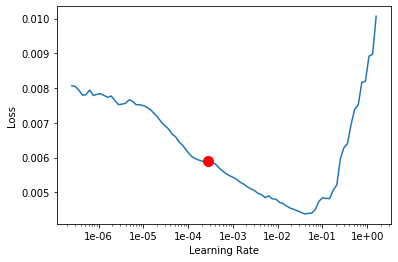

The model is now ready for training, using the `model.fit()` method. The `model.fit()` is given the number of epochs for training and the estimated learning rate generated by `lr_find()` in the previous step:

In [ ]:
fcn.fit(100, lr=0.0002754)

This model will train for 100 epochs using the provided learning rate. If the learning rate is not mentioned, then an optimal learning rate is automatically deduced for training the model.

Other important inputs are the two optional boolean parameters of `early_stopping` and `checkpoint`. The `early_stopping` parameter by default is set to `False`, but if set to `True`, will stop the training if validation loss stops improving for 5 epochs. The `checkpoint` parameter can be used to save the best model during training. When set to `True`, the best model based on validation loss will be saved during training.

### ML Model Training<a class="anchor" id="10"></a>
Once the machine learning model is initialized with the data and the scikit-learn model parameters mentioned in the previous step, the `model.fit()` method is used for fitting the machine learning model. 

In [ ]:
model.fit()

The training results are printed using `model.show_results()` to assess the quality of the trained model and also compute model metrics. The `model.show_results()` will  typically output a table where the last column will contain the values predicted by the model after being applied to the test dataset. Comparing the predicted values with the actual target variable will give some indication of the performance of the trained model. Subsequently, the model metrics of the trained model can be estimated using the `model.score()` function which currently returns the r-square, which also reflects model performance.

## Model Validation metrics, Saving & Loading<a class="anchor" id="11"></a> 

After training the `FullyConnectedNetwork` model, the train vs valid losses can be plotted using `model.plot_losses()` to check if the model is overfitting. For example, the plot below shows that the model has trained well. While the losses are still gradually decreasing, they are not decreasing at a significant level and the model is therefore ready and can be saved for inferencing.

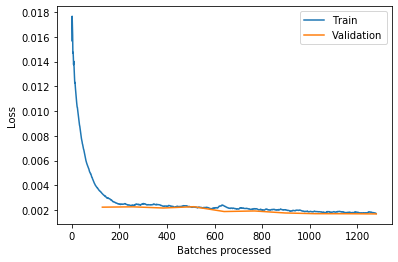

Finally the `fcn.show_results()` or generally the `model.show_results()` for both the `MLModel` and the `FullyConnectedNetwork` model will print the training results with the prediction saved in the column named `prediction_results` of the dataframe and will let the user assess the prediction on the test set by the trained model. This can also be determined by the model metrics of the trained model which is estimated similarly for the two models by the `model.score()` method and returns R-square score for regression model and accuracy for classification model.

The trained model can now be saved using the `model.save(name_or_path)` command, which will save the model weights and create an `Esri Model Definition and Deep Learning Package` or `DLPK` zip. For example:

In [ ]:
fcn.save(r'C:\2020\5-May\solar energy\saved_model\trained_model', publish=True)

The `publish` parameter is an optional boolean which publishes the DLPK as an item in Arcgis portal. Another optional parameter is `framework`, which by default saves the model with a PyTorch backend(`framework='PyTorch'`). It can be used to also save the model with a TF-ONNX backend(`framework='TF-ONNX'`).    

The saved model can be loaded back using `model.from_model(emd_path, data=None)` or here by using `fcn.from_model(emd_path, data=None)` or by `MLModel.from_model(emd_path, data=None)`, which will load the trained model from the provided `emd_path` and would be ready for inferencing. The `data` parameter is optional and requires a fastai Databunch returned  by the `prepare_tabulardata` function, and is only for further training the model on a new dataset.

## Model Inferencing <a class="anchor" id="12"></a> 

### Predicting to features

With a model that has been trained using any combination of `Explanatory Variables`, `distance Features`, and `Explanatory Training Rasters`, it can be used to predict to either points or polygons in either the same or a different study area. Predicting to features requires that every feature receiving a prediction have values for each field, distance feature, and raster provided.

If the Input Training Features and Input Prediction Features field names do not match, a `match_field_names` parameter is provided. When matching explanatory variables, the Prediction and Training fields must be of the same type (a double field in Training must be matched to a double field in Prediction).

### Predicting to rasters

Using a trained model, you can choose to predict to a raster in either the same or a different study area. If you want to use prediction rasters other than those used for training the model because you are predicting either in a different study area or a different time period, add raster names mapping in `match_field_names` parameter.

## Summary <a class="anchor" id="13"></a>

Here in this example we have used only one classifier model which is the gradient boosting classifier. As we know there are several other models available in scikit-learn, and the `MLModel()` method provides the flexibility of choosing any one of them with its respective hyperparameters to initialize the model. Subsequently using model selection, the best model can be selected along with the optimal hyperparameters.  

Both the `FullyConnectedNetwork` and `MLModel` discussed above has their own set of pro and cons, and a brief comparison is as follows:

| `FullyConnectedNetwork`                                                                                                             | `MLModel`                                                                                                                                                                                                                    |
|-------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Usually requires large dataset                                                                                                      | Performs well with comparatively fewer data points                                                                                                                                                                           |
| Returns different result for each run due to random weight initialization                                                           | More stable than neural network, and usually returns the same result except in some cases which depends on the data used for the model.                                                                                      |
| It has some universal parameters for fine-tuning, like the number of hidden layers, learning rate, number of epochs, batch size etc | Several scikit-learn models are available, and each need its own set of unique parameters & hyperparameters setting, followed by fine-tuning. Ideally should be followed by model selection for selecting the optimal model. |

Implementation of the `FullyConnectedNetwork` and `MLModel` architecture can be better understood in one of the sample notebooks where energy generation from solar photovoltaic power plants using weather variables has been predicted using both models and is available in this [repository for GIS analysts and data scientists](https://developers.arcgis.com/python/sample-notebooks/), along with other interesting notebooks based on the various modules from ArcGIS API for Python.   